## Import

In [12]:
from sklearn.datasets import load_breast_cancer

In [2]:
bc = load_breast_cancer()

In [11]:
print(bc.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

## Dataset Info

In [4]:
bc.target[0]

np.int64(0)

In [5]:
bc.target.shape

(569,)

In [6]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [7]:
bc.data.shape

(569, 30)

## Preprocessing

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [10]:
print(f"Features => Train: {X_train.shape} - Test: {X_test.shape}")
print(f"Labels => Train: {y_train.shape} - Test: {y_test.shape}")

Features => Train: (455, 30) - Test: (114, 30)
Labels => Train: (455,) - Test: (114,)


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train[0]

array([0.12423683, 0.29895178, 0.12335015, 0.05816175, 0.29051187,
       0.22360591, 0.19732896, 0.1139165 , 0.45345672, 0.44839933,
       0.0263987 , 0.12877917, 0.03166376, 0.01015424, 0.14416834,
       0.31165265, 0.1269697 , 0.16120477, 0.13533517, 0.10834957,
       0.11190476, 0.29450959, 0.11649617, 0.05186645, 0.35407186,
       0.30494513, 0.37102564, 0.2790378 , 0.2793219 , 0.2834186 ])

## Classification

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred_test)

    print(f"acc train: {acc_train} - acc test: {acc_test} - precision: {p} - recall: {r} - f1_score: {f1}")

    return acc_train, acc_test, p, r, f1

### 1. Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [18]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb, f1_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9428571428571428 - acc test: 0.9298245614035088 - precision: 0.9367088607594937 - recall: 0.961038961038961 - f1_score: 0.9487179487179487


### 2. KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree', leaf_size=28)
knn.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'kd_tree'
,leaf_size,28
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [21]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn, f1_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9692307692307692 - acc test: 0.9736842105263158 - precision: 1.0 - recall: 0.961038961038961 - f1_score: 0.9801324503311258


### 3. Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=128, min_samples_split=4, criterion='entropy')
dt.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,128
,min_samples_split,4
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [24]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt, f1_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0 - acc test: 0.9649122807017544 - precision: 0.974025974025974 - recall: 0.974025974025974 - f1_score: 0.974025974025974


### 4. Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=4)
rf.fit(X_train, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,64
,min_samples_split,4
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf, f1_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0 - acc test: 0.956140350877193 - precision: 0.9615384615384616 - recall: 0.974025974025974 - f1_score: 0.967741935483871


### 5. SVM

In [31]:
from sklearn.svm import SVC

svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [32]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm, f1_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9868131868131869 - acc test: 0.9912280701754386 - precision: 0.9871794871794872 - recall: 1.0 - f1_score: 0.9935483870967742


### 6. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [34]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

acc_train_lr, acc_test_lr, p_lr, r_lr, f1_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9714285714285714 - acc test: 0.9912280701754386 - precision: 0.9871794871794872 - recall: 1.0 - f1_score: 0.9935483870967742


### 7. ANN

In [41]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=1024, activation='relu', solver='adam', batch_size=32)
ann.fit(X_train, y_train)

C:\Users\ghmoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,1024
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,32
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [42]:
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann, f1_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9912087912087912 - acc test: 0.9912280701754386 - precision: 0.9871794871794872 - recall: 1.0 - f1_score: 0.9935483870967742


## Comparison

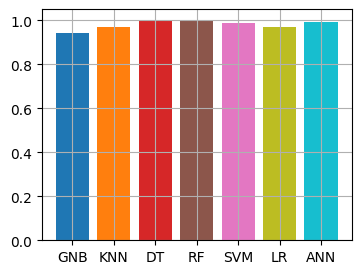

In [53]:
import matplotlib.pyplot as plt
import numpy as np

acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = plt.cm.tab10(np.linspace(0, 1, 7))

plt.figure(figsize=(4, 3))
plt.bar(title, acc_train, color=colors)
plt.grid()

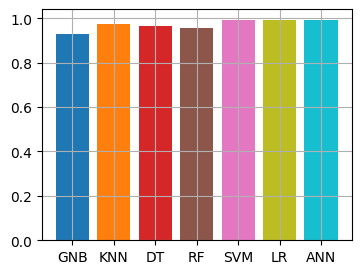

In [56]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = plt.cm.tab10(np.linspace(0, 1, 7))

plt.figure(figsize=(4, 3))
plt.bar(title, acc_test, color=colors)
plt.grid()

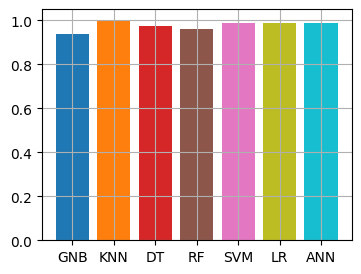

In [57]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = plt.cm.tab10(np.linspace(0, 1, 7))

plt.figure(figsize=(4, 3))
plt.bar(title, p, color=colors)
plt.grid()

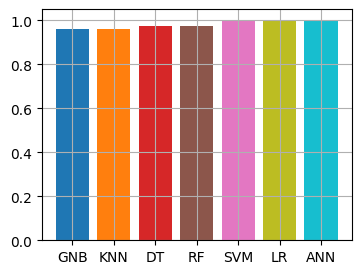

In [58]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = plt.cm.tab10(np.linspace(0, 1, 7))

plt.figure(figsize=(4, 3))
plt.bar(title, r, color=colors)
plt.grid()

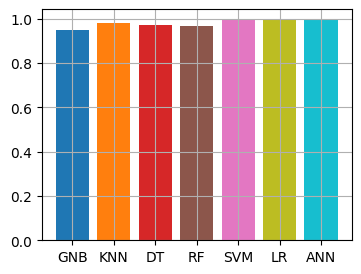

In [59]:
f1 = [f1_gnb, f1_knn, f1_dt, f1_rf, f1_svm, f1_lr, f1_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = plt.cm.tab10(np.linspace(0, 1, 7))

plt.figure(figsize=(4, 3))
plt.bar(title, f1, color=colors)
plt.grid()

In [60]:
import pandas as pd

df = pd.DataFrame(bc.data, columns=bc.feature_names)

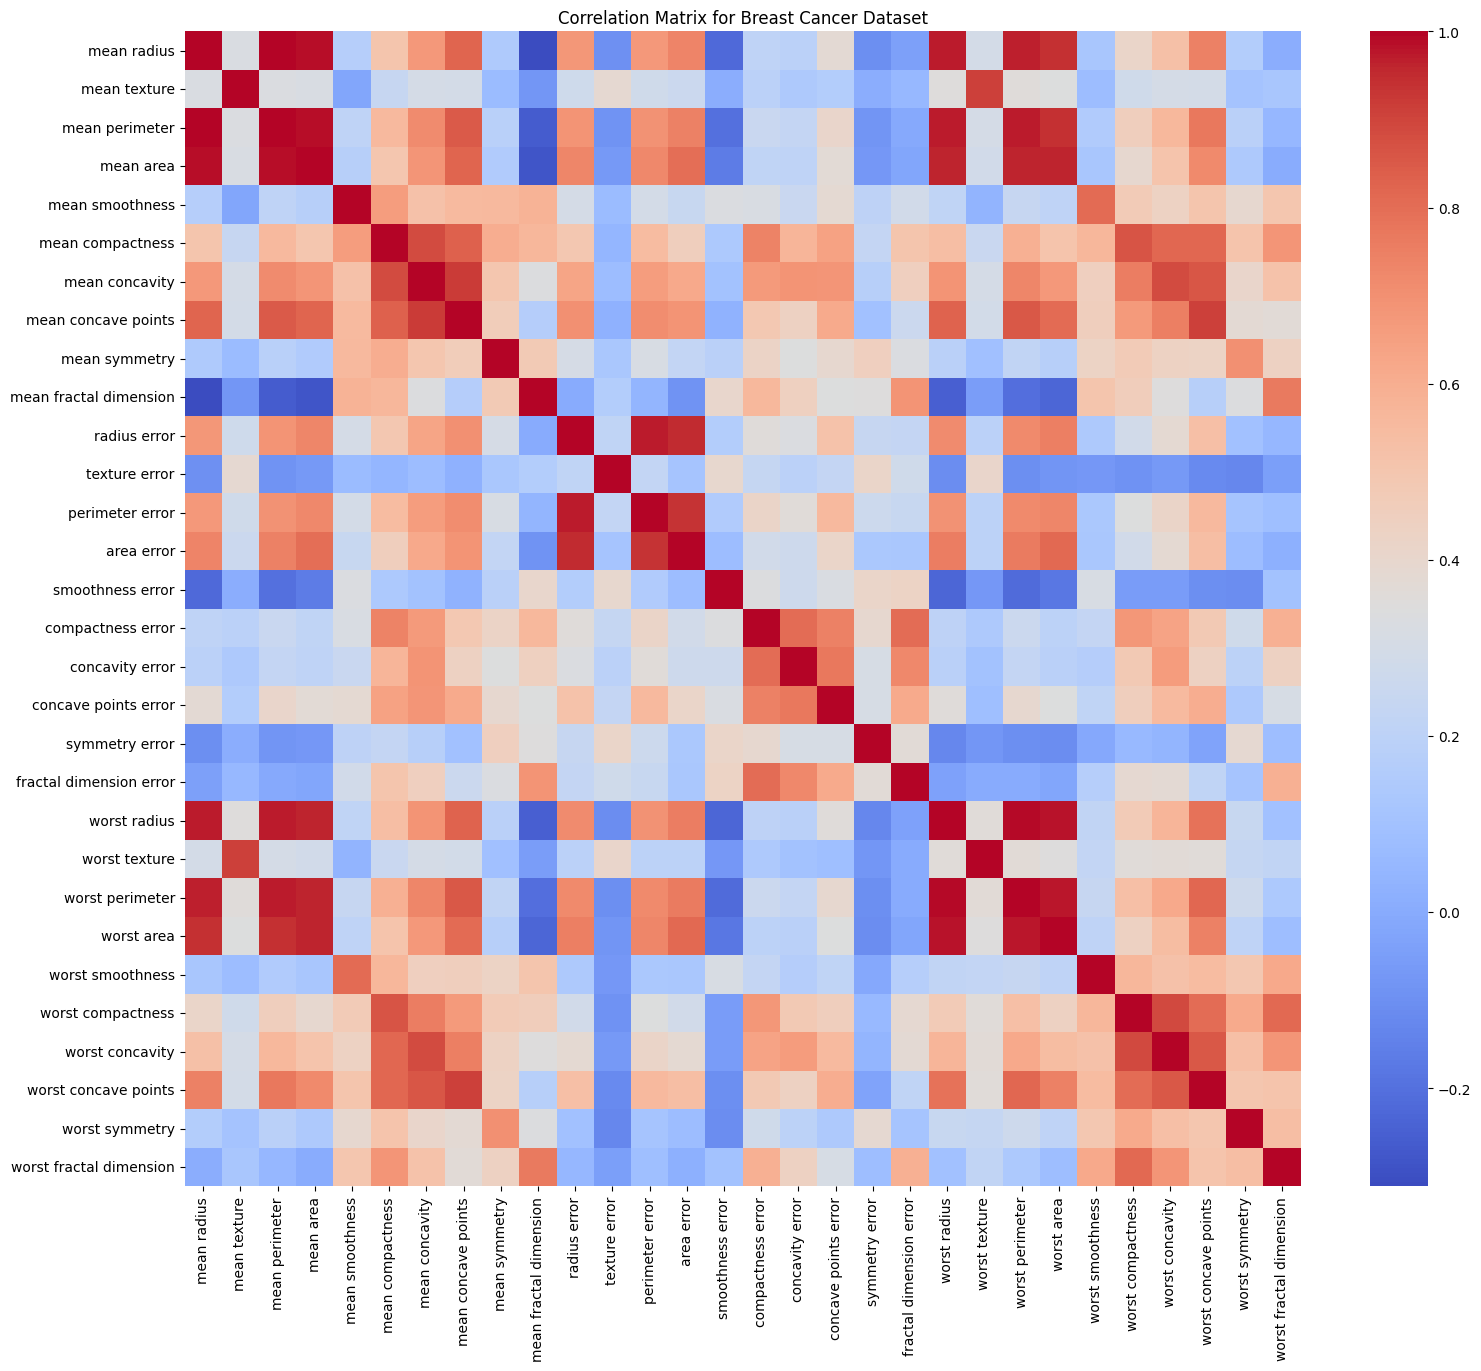

In [61]:
import seaborn as sns

corr = df.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix for Breast Cancer Dataset")
plt.show()